In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('SVR_WithTime_Offset_2_Trial_1.csv', header=0)
trial2_results = pd.read_csv('SVR_WithTime_Offset_2_Trial_2.csv', header=0)
trial3_results = pd.read_csv('SVR_WithTime_Offset_2_Trial_3.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,0.0,8.6319,3000.0
4,5.0,9.0,8.6319,2000.0
...,...,...,...,...
3001,3002.0,5.0,5.0960,842200.0
3002,3003.0,0.0,7.6321,843200.0
3003,3004.0,0.0,6.8727,844200.0
3004,3005.0,0.0,5.2740,845200.0


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,1.0,8.8896,1900.0
3,4.0,2.0,7.3198,2700.0
4,5.0,3.0,4.5642,3200.0
...,...,...,...,...
3001,3002.0,7.0,3.2876,801300.0
3002,3003.0,7.0,3.2876,800800.0
3003,3004.0,7.0,3.2876,800300.0
3004,3005.0,2.0,7.6534,801100.0


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,0.0,8.6319,3000.0
4,5.0,0.0,6.2580,4000.0
...,...,...,...,...
3001,3002.0,4.0,5.0538,909000.0
3002,3003.0,4.0,5.0538,908500.0
3003,3004.0,0.0,7.5391,909500.0
3004,3005.0,1.0,7.7165,910400.0


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,1000.0,1000.0,1000.0
2,2000.0,1900.0,2000.0
3,3000.0,2700.0,3000.0
4,2000.0,3200.0,4000.0
...,...,...,...
2995,839300.0,799700.0,907500.0
2996,840300.0,800500.0,907000.0
2997,841300.0,801000.0,908000.0
2998,842300.0,800500.0,909000.0


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,1000.0,1000.0,1000.0,1000.000000
2,2000.0,1900.0,2000.0,1966.666667
3,3000.0,2700.0,3000.0,2900.000000
4,2000.0,3200.0,4000.0,3066.666667
...,...,...,...,...
2995,839300.0,799700.0,907500.0,848833.333333
2996,840300.0,800500.0,907000.0,849266.666667
2997,841300.0,801000.0,908000.0,850100.000000
2998,842300.0,800500.0,909000.0,850600.000000


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,1000.0,1000.0,1000.0,1000.000000,0.000000
2,2000.0,1900.0,2000.0,1966.666667,57.735027
3,3000.0,2700.0,3000.0,2900.000000,173.205081
4,2000.0,3200.0,4000.0,3066.666667,1006.644591
...,...,...,...,...,...
2995,839300.0,799700.0,907500.0,848833.333333,54528.646905
2996,840300.0,800500.0,907000.0,849266.666667,53813.226379
2997,841300.0,801000.0,908000.0,850100.000000,54040.077720
2998,842300.0,800500.0,909000.0,850600.000000,54724.126306


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 1000.0,
 1966.6666666666667,
 2900.0,
 3066.6666666666665,
 2900.0,
 2666.6666666666665,
 2933.3333333333335,
 3166.6666666666665,
 3366.6666666666665,
 3133.3333333333335,
 3366.6666666666665,
 3600.0,
 3400.0,
 3166.6666666666665,
 3400.0,
 3833.3333333333335,
 3833.3333333333335,
 4266.666666666667,
 5133.333333333333,
 5566.666666666667,
 5500.0,
 5466.666666666667,
 5933.333333333333,
 6366.666666666667,
 6833.333333333333,
 7766.666666666667,
 8166.666666666667,
 8966.666666666666,
 9400.0,
 9800.0,
 9766.666666666666,
 10166.666666666666,
 10000.0,
 9166.666666666666,
 8300.0,
 7933.333333333333,
 8400.0,
 8900.0,
 8900.0,
 8866.666666666666,
 9300.0,
 9633.333333333334,
 10433.333333333334,
 10766.666666666666,
 10733.333333333334,
 10666.666666666666,
 11500.0,
 12000.0,
 12500.0,
 13433.333333333334,
 13266.666666666666,
 12766.666666666666,
 13700.0,
 14600.0,
 15000.0,
 15900.0,
 16366.666666666666,
 16766.666666666668,
 16733.333333333332,
 17600.0,
 18000.0,
 18300

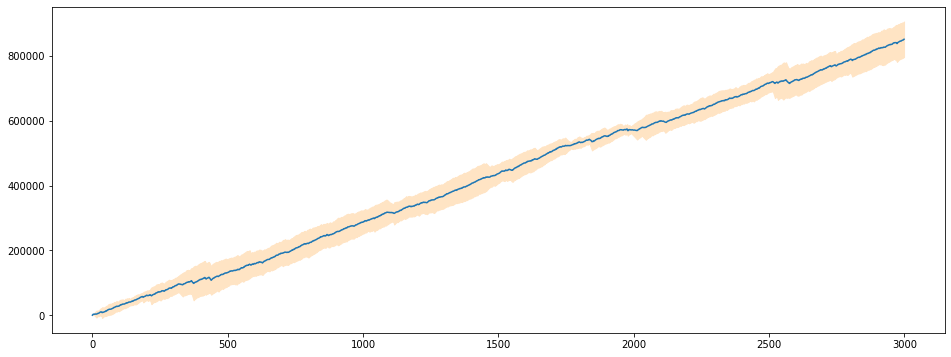

In [15]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(16, 6))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0.0,
 0.0,
 0.0,
 0.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 6.0,
 1.0,
 1.0,
 2.0,
 3.0,
 7.0,
 7.0,
 7.0,
 2.0,
 3.0,
 8.0,
 8.0,
 8.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 3.0,
 3.0,
 3.0,
 7.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 6.0,
 1.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 1.0,
 5.0,
 0.0,
 0.0,
 1.0,
 2.0,
 3.0,
 7.0,
 2.0,
 6.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 1.0,
 2.0,
 2.0,
 6.0,
 1.0,
 2.0,
 2.0,
 6.0,
 1.0,
 2.0,
 2.0,
 6.0,
 1.0,
 2.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 6.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 1.0,
 5.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0

In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

31

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,0.0,8.6319,3000.0
4,5.0,9.0,8.6319,2000.0
...,...,...,...,...
2995,2996.0,5.0,5.1122,839300.0
2996,2997.0,0.0,6.7379,840300.0
2997,2998.0,0.0,5.9832,841300.0
2998,2999.0,0.0,6.8701,842300.0


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[35.0,
 36.0,
 37.0,
 187.0,
 188.0,
 189.0,
 215.0,
 216.0,
 217.0,
 218.0,
 219.0,
 368.0,
 369.0,
 370.0,
 371.0,
 372.0,
 373.0,
 374.0,
 375.0,
 1042.0,
 1043.0,
 1113.0,
 1114.0,
 1115.0,
 1116.0,
 1909.0,
 1919.0,
 2464.0,
 2565.0,
 2566.0,
 2567.0,
 2568.0,
 2569.0,
 2570.0,
 2571.0,
 2572.0,
 2573.0,
 2574.0,
 2575.0,
 2576.0,
 2577.0,
 2729.0,
 2730.0,
 2731.0,
 2732.0,
 2973.0,
 2974.0]

In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

11

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 11
Number of instances in trial2 in state 8: 9
Number of instances in trial1 in state 8: 4
Average number of instances in state 8: 8.0


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 18
Number of instances in trial2 in state 9: 26
Number of instances in trial1 in state 9: 21
Average number of instances in state 9: 21.666666666666668


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 769 timesteps 0.2563 percentage of time in trial 1
Machine is in state 0 for 790 timesteps 0.2633 percentage of time in trial 2
Machine is in state 0 for 792 timesteps 0.2640 percentage of time in trial 3
Machine is in state 0 for 783.6667 timesteps 0.2612 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 599 timesteps 0.1997 percentage of time in trial 1
Machine is in state 1 for 585 timesteps 0.1950 percentage of time in trial 2
Machine is in state 1 for 632 timesteps 0.2107 percentage of time in trial 3
Machine is in state 1 for 605.3333 timesteps 0.2018 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 332 timesteps 0.1107 percentage of time in trial 1
Machine is in state 2 for 316 timesteps 0.1053 percentage of time in trial 2
Machine is in state 2 for 299 timesteps 0.0997 percentage of time in trial 3
Machine is in state 2 for 315.6667 timesteps 0.1052 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 95 timesteps 0.0317 percentage of time in trial 1
Machine is in state 3 for 100 timesteps 0.0333 percentage of time in trial 2
Machine is in state 3 for 61 timesteps 0.0203 percentage of time in trial 3
Machine is in state 3 for 85.3333 timesteps 0.0284 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 316 timesteps 0.1053 percentage of time in trial 1
Machine is in state 4 for 321 timesteps 0.1070 percentage of time in trial 2
Machine is in state 4 for 294 timesteps 0.0980 percentage of time in trial 3
Machine is in state 4 for 310.3333 timesteps 0.1034 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 350 timesteps 0.1167 percentage of time in trial 1
Machine is in state 5 for 316 timesteps 0.1053 percentage of time in trial 2
Machine is in state 5 for 400 timesteps 0.1333 percentage of time in trial 3
Machine is in state 5 for 355.3333 timesteps 0.1184 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 261 timesteps 0.0870 percentage of time in trial 1
Machine is in state 6 for 207 timesteps 0.0690 percentage of time in trial 2
Machine is in state 6 for 262 timesteps 0.0873 percentage of time in trial 3
Machine is in state 6 for 243.3333 timesteps 0.0811 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 117 timesteps 0.0390 percentage of time in trial 1
Machine is in state 7 for 140 timesteps 0.0467 percentage of time in trial 2
Machine is in state 7 for 89 timesteps 0.0297 percentage of time in trial 3
Machine is in state 7 for 115.3333 timesteps 0.0384 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 47 timesteps 0.0157 percentage of time in trial 1
Machine is in state 8 for 50 timesteps 0.0167 percentage of time in trial 2
Machine is in state 8 for 13 timesteps 0.0043 percentage of time in trial 3
Machine is in state 8 for 36.6667 timesteps 0.0122 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 114 timesteps 0.0380 percentage of time in trial 1
Machine is in state 9 for 175 timesteps 0.0583 percentage of time in trial 2
Machine is in state 9 for 158 timesteps 0.0527 percentage of time in trial 3
Machine is in state 9 for 149.0000 timesteps 0.0497 percentage of time on average
